### EDA Challenge



In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean   
from statsmodels import robust      
import wquantiles                   

import seaborn as sns
import matplotlib.pylab as plt

### Extraccion de Csv

In [2]:
df_city = pd.read_csv('../csv_tables/diamonds_city.csv')
df_city

,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris
5,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv
6,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai
7,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly
8,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat
9,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp


In [3]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city_id  13 non-null     object
 1   city     13 non-null     object
dtypes: object(2)
memory usage: 340.0+ bytes


In [4]:
df_clarity = pd.read_csv('../csv_tables/diamonds_clarity.csv')
df_clarity

,clarity_id,clarity
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2
1,3f9db06236e9719b61c826b612b882fa702ec81574e44c...,VVS2
2,66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...,VVS1
3,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF
4,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1
5,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1
6,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1
7,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2


In [5]:
df_clarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clarity_id  8 non-null      object
 1   clarity     8 non-null      object
dtypes: object(2)
memory usage: 260.0+ bytes


In [6]:
df_color = pd.read_csv('../csv_tables/diamonds_color.csv')
df_color

,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D
2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H
3,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J
4,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,I
5,a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...,E
6,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F


In [7]:
df_cut = pd.read_csv('../csv_tables/diamonds_cut.csv')
df_cut

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal
2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
3,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
4,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair


In [8]:
df_dimensions = pd.read_csv('../csv_tables/diamonds_dimensions.csv')
df_dimensions

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76


In [9]:
df_properties = pd.read_csv('../csv_tables/diamonds_properties.csv')
df_properties

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [10]:
df_transactional = pd.read_csv('../csv_tables/diamonds_transactional.csv')
df_transactional

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33


In [11]:
#Juntamos los dos df 
df_diamond = pd.concat([df_transactional, df_properties], axis=1)
df_diamond

,index_id,price,city_id,carat,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [12]:
#Nos quedamos con una unica columna de index_id
df_diamond = pd.merge(df_transactional, df_properties, how='left', on='index_id')
df_diamond

,index_id,price,city_id,carat,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [13]:
#Juntamos el tercer df
df_diamond_final = pd.concat([df_diamond, df_dimensions], axis = 1)
df_diamond_final

,index_id,price,city_id,carat,cut_id,color_id,clarity_id,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76


In [14]:
#Nos quedamos con una unica columna de index_id
df_diamond_final = pd.merge(df_diamond, df_dimensions, how='left', on='index_id')
df_diamond_final

,index_id,price,city_id,carat,cut_id,color_id,clarity_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,61.9,54.3,4.45,4.47,2.76


In [15]:
df_diamond_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index_id    40455 non-null  object 
 1   price       40455 non-null  int64  
 2   city_id     40455 non-null  object 
 3   carat       40455 non-null  float64
 4   cut_id      40455 non-null  object 
 5   color_id    40455 non-null  object 
 6   clarity_id  40455 non-null  object 
 7   depth       40455 non-null  float64
 8   table       40455 non-null  float64
 9   x           40455 non-null  float64
 10  y           40455 non-null  float64
 11  z           40455 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 3.7+ MB


### Merge de columnas

In [16]:
df_diamond_final = df_diamond_final.merge(df_cut, how = 'left', on = 'cut_id')
df_diamond_final

,index_id,price,city_id,carat,cut_id,color_id,clarity_id,depth,table,x,y,z,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,62.4,58.0,6.83,6.79,4.25,Premium
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,63.0,57.0,4.35,4.38,2.75,Very Good
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,65.5,55.0,5.62,5.53,3.65,Fair
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,63.8,56.0,4.68,4.72,3.00,Good
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,60.5,59.0,6.55,6.51,3.95,Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,62.7,57.0,7.10,7.04,4.43,Ideal
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,57.1,60.0,8.31,8.25,4.73,Good
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,62.7,56.0,6.37,6.42,4.01,Ideal
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,61.9,54.3,4.45,4.47,2.76,Ideal


In [17]:
df_diamond_final = df_diamond_final.drop('cut_id', axis = 1)
df_diamond_final

,index_id,price,city_id,carat,color_id,clarity_id,depth,table,x,y,z,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,62.4,58.0,6.83,6.79,4.25,Premium
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.32,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,63.0,57.0,4.35,4.38,2.75,Very Good
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.71,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,65.5,55.0,5.62,5.53,3.65,Fair
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,0.41,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,63.8,56.0,4.68,4.72,3.00,Good
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,60.5,59.0,6.55,6.51,3.95,Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,1.34,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,62.7,57.0,7.10,7.04,4.43,Ideal
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,2.02,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,57.1,60.0,8.31,8.25,4.73,Good
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,1.01,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,62.7,56.0,6.37,6.42,4.01,Ideal
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.33,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,61.9,54.3,4.45,4.47,2.76,Ideal


In [18]:
df_diamond_final = df_diamond_final.merge(df_city, how = 'left', on = 'city_id')
df_diamond_final = df_diamond_final.drop('city_id', axis = 1)
df_diamond_final

,index_id,price,carat,color_id,clarity_id,depth,table,x,y,z,cut,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,62.4,58.0,6.83,6.79,4.25,Premium,Kimberly
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,0.32,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,63.0,57.0,4.35,4.38,2.75,Very Good,Antwerp
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,0.71,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,65.5,55.0,5.62,5.53,3.65,Fair,London
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,0.41,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,63.8,56.0,4.68,4.72,3.00,Good,New York City
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,1.02,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,60.5,59.0,6.55,6.51,3.95,Ideal,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,1.34,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,62.7,57.0,7.10,7.04,4.43,Ideal,New York City
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,2.02,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,57.1,60.0,8.31,8.25,4.73,Good,Zurich
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,1.01,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,62.7,56.0,6.37,6.42,4.01,Ideal,Tel Aviv
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,0.33,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,61.9,54.3,4.45,4.47,2.76,Ideal,Paris


In [19]:
df_diamond_final = df_diamond_final.merge(df_clarity, how = 'left', on = 'clarity_id')
df_diamond_final = df_diamond_final.drop('clarity_id', axis = 1)
df_diamond_final

,index_id,price,carat,color_id,depth,table,x,y,z,cut,city,clarity
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,6da43b944e494e885e69af021f93c6d9331c78aa228084...,62.4,58.0,6.83,6.79,4.25,Premium,Kimberly,VS2
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,0.32,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,63.0,57.0,4.35,4.38,2.75,Very Good,Antwerp,VS2
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,0.71,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,65.5,55.0,5.62,5.53,3.65,Fair,London,VS1
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,0.41,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,63.8,56.0,4.68,4.72,3.00,Good,New York City,SI1
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,1.02,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,60.5,59.0,6.55,6.51,3.95,Ideal,Dubai,SI1
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,1.34,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,62.7,57.0,7.10,7.04,4.43,Ideal,New York City,VS1
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,2.02,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,57.1,60.0,8.31,8.25,4.73,Good,Zurich,SI2
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,1.01,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,62.7,56.0,6.37,6.42,4.01,Ideal,Tel Aviv,SI1
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,0.33,6da43b944e494e885e69af021f93c6d9331c78aa228084...,61.9,54.3,4.45,4.47,2.76,Ideal,Paris,VS1


In [20]:
df_diamond_final = df_diamond_final.merge(df_color, how = 'left', on = 'color_id')
df_diamond_final = df_diamond_final.drop('color_id', axis = 1)
df_diamond_final

,index_id,price,carat,depth,table,x,y,z,cut,city,clarity,color
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,62.4,58.0,6.83,6.79,4.25,Premium,Kimberly,VS2,J
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,0.32,63.0,57.0,4.35,4.38,2.75,Very Good,Antwerp,VS2,H
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,0.71,65.5,55.0,5.62,5.53,3.65,Fair,London,VS1,G
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,0.41,63.8,56.0,4.68,4.72,3.00,Good,New York City,SI1,D
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,1.02,60.5,59.0,6.55,6.51,3.95,Ideal,Dubai,SI1,G
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,1.34,62.7,57.0,7.10,7.04,4.43,Ideal,New York City,VS1,G
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,2.02,57.1,60.0,8.31,8.25,4.73,Good,Zurich,SI2,F
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,1.01,62.7,56.0,6.37,6.42,4.01,Ideal,Tel Aviv,SI1,H
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,0.33,61.9,54.3,4.45,4.47,2.76,Ideal,Paris,VS1,J


### Media y mediana

In [78]:
df_new = df_diamond_final.groupby(['index_id']).mean(['price'])
df_new

,price,carat,depth,table,x,y,z
index_id,,,,,,,
0002a1cf14e9c1acaa8255fd6777d916d3aec6bc1f3c8a3d0a3a89a5eba87970,1809.0,0.54,61.7,56.0,5.22,5.25,3.23
0002dc999ce736640267221e6a004da4b837667ca7de5c8eb92832927495013f,5889.0,1.24,61.7,57.0,6.95,6.88,4.27
00037f39cf870a1f49129f9c82d935665d352ffd25ea3296208f6f7b16fd654f,3963.0,0.91,62.3,57.0,6.22,6.13,3.85
00039a15178b11924de22fd1a02f6efb00d8af33c171a6b67614871e8d6012da,17552.0,1.59,61.2,58.0,7.58,7.49,4.61
0007256972781977cbceab0e2cbdc57e20512a6f2975296852029da5bc8aad30,819.0,0.30,62.9,58.0,4.29,4.26,2.69
...,...,...,...,...,...,...,...
fff81139a7dd8a3a48f462347a5611b8e0b84258237d5d3d8c95204f3bb6e3f0,4797.0,1.05,60.5,58.0,6.55,6.60,3.98
fffb2bcdee8b153cbd63617ddc29b4ecf529e15a20ed3c1b3d5baf801e1d2deb,2690.0,0.74,61.1,57.0,5.81,5.84,3.56
fffb7503311e0a0216918886db1208459195da3102267e98af4310a91e952163,792.0,0.40,61.2,55.0,4.75,4.79,2.92


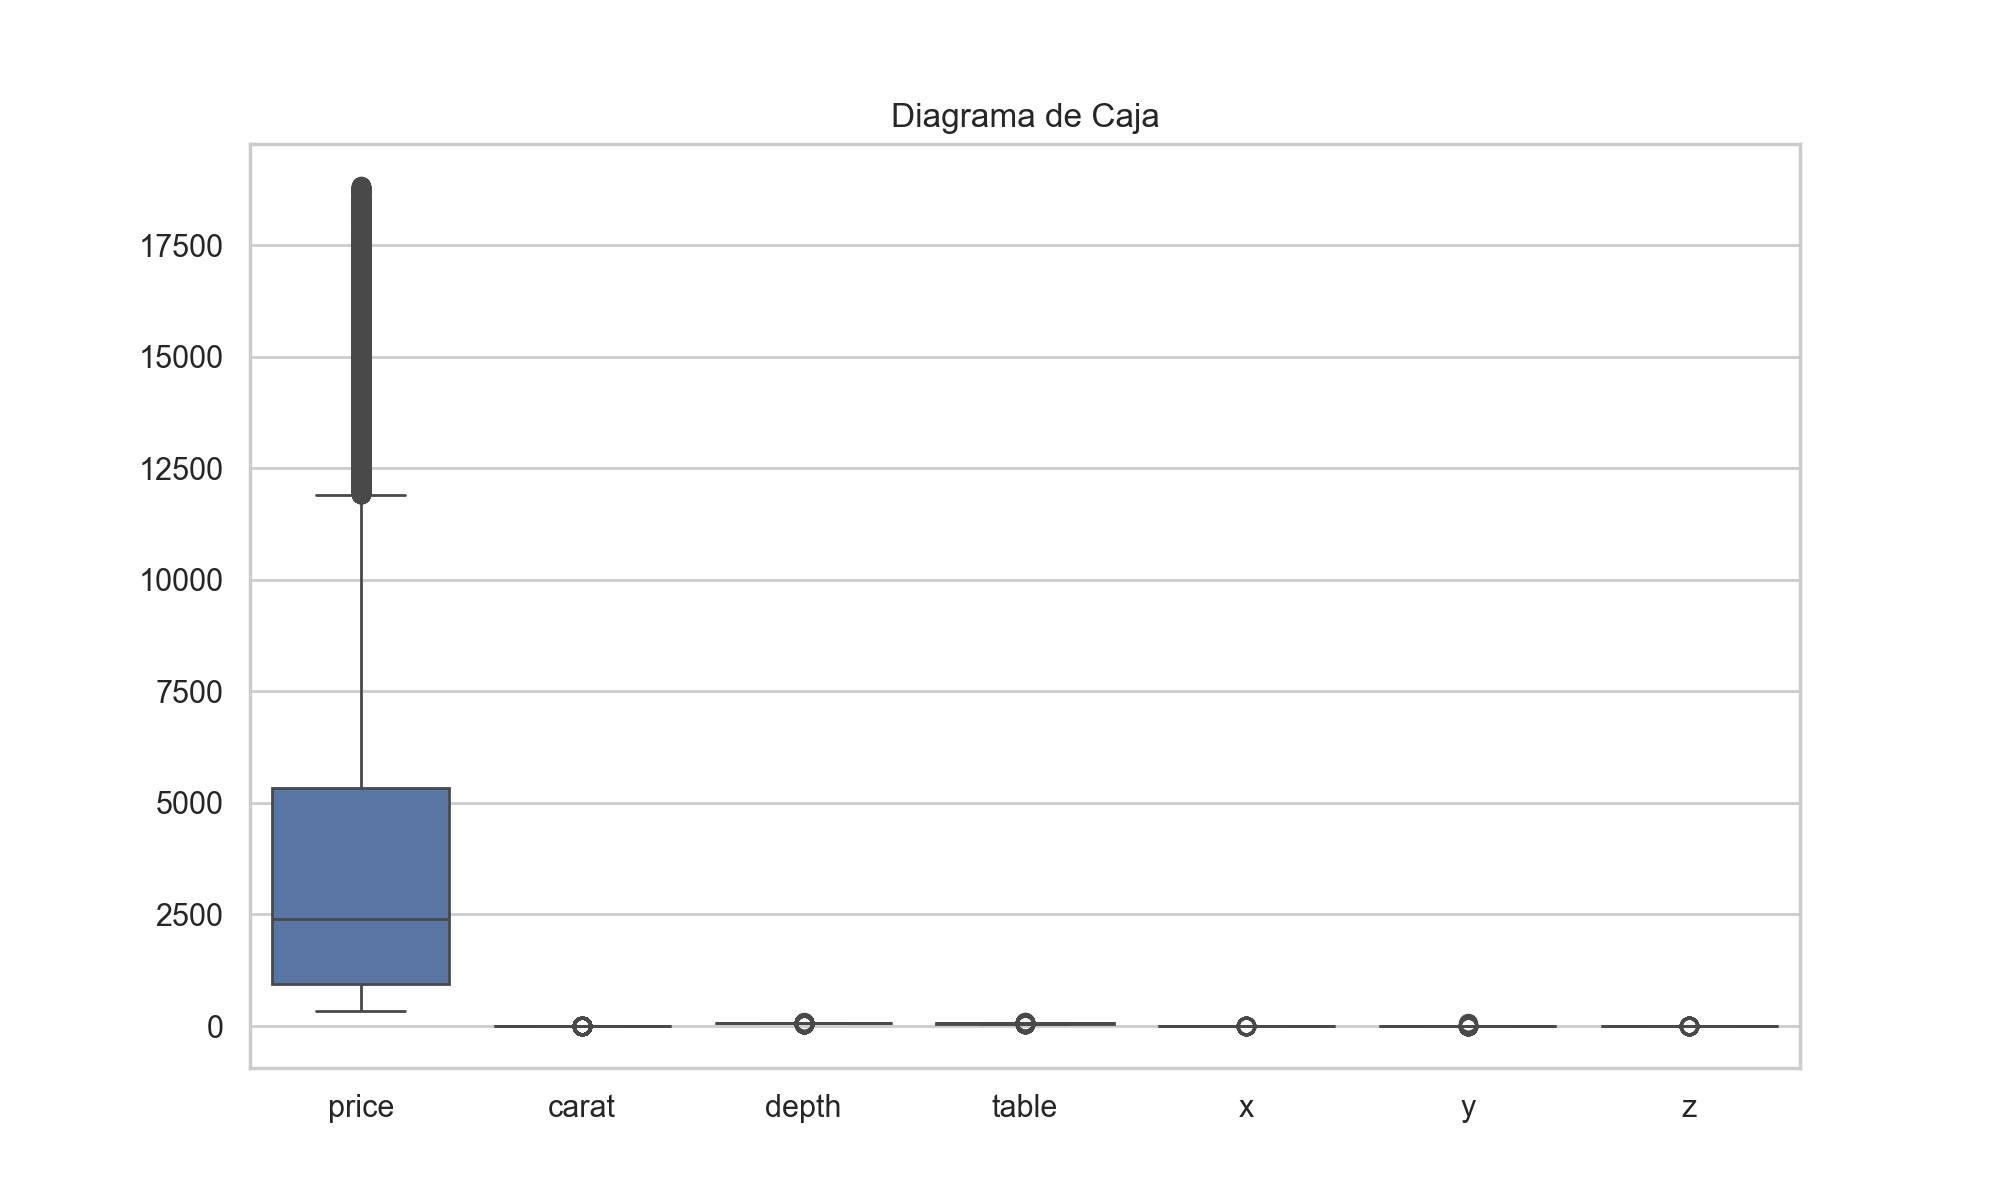

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diamond_final)
plt.title('Diagrama de Caja')
plt.show()

<Axes: ylabel='Frequency'>

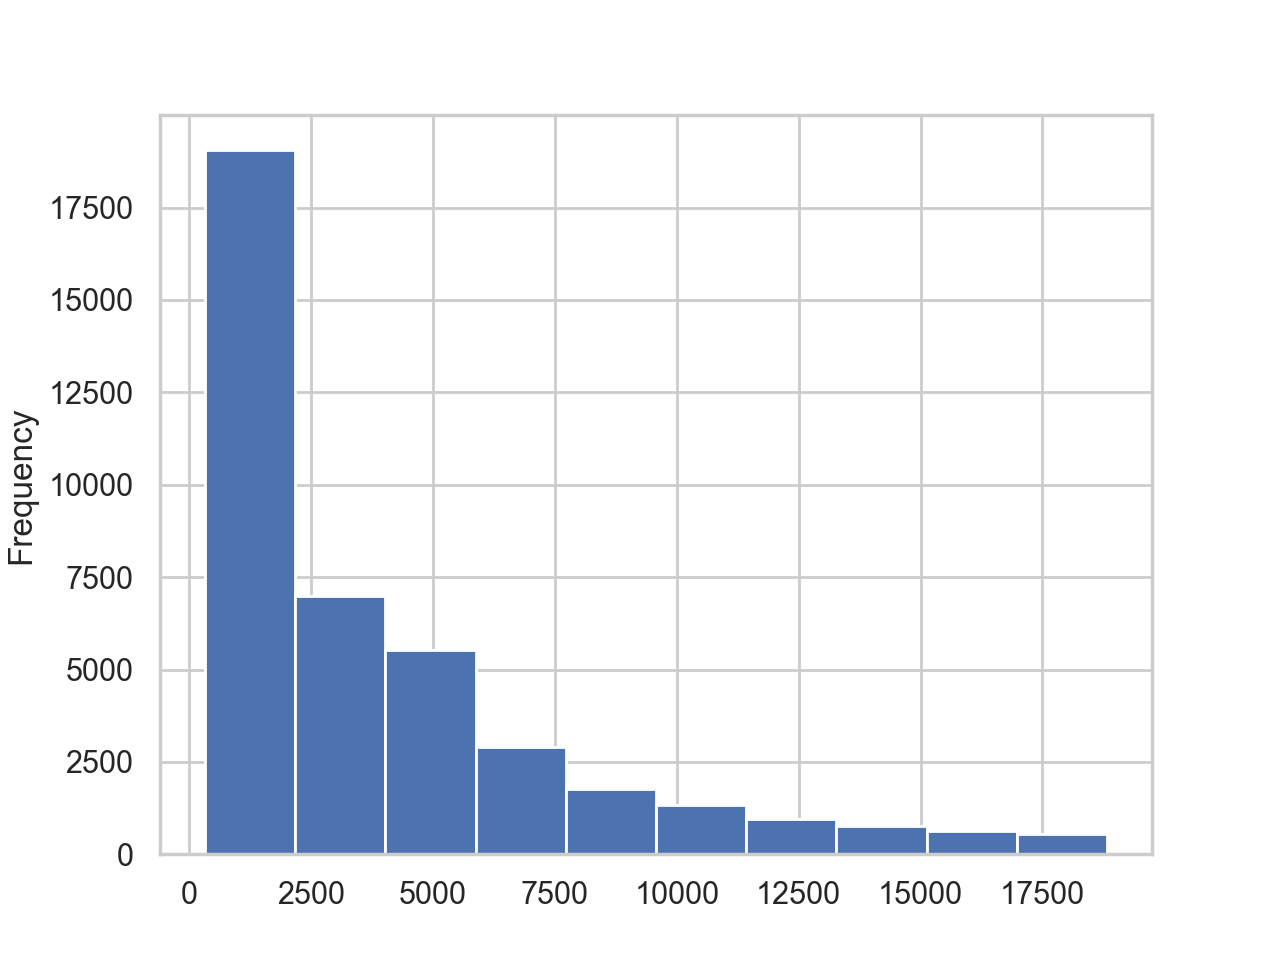

In [80]:
df_diamond_final['price'].plot(kind ='hist')

In [81]:
df_new.corr()

,price,carat,depth,table,x,y,z
price,1.000000,0.921935,-0.014864,0.130111,0.885848,0.866163,0.874500
carat,0.921935,1.000000,0.026528,0.183392,0.975688,0.951667,0.967570
depth,-0.014864,0.026528,1.000000,-0.293114,-0.026348,-0.030966,0.094655
table,0.130111,0.183392,-0.293114,1.000000,0.196059,0.184673,0.155189
x,0.885848,0.975688,-0.026348,0.196059,1.000000,0.973712,0.984876
y,0.866163,0.951667,-0.030966,0.184673,0.973712,1.000000,0.964828
z,0.874500,0.967570,0.094655,0.155189,0.984876,0.964828,1.000000


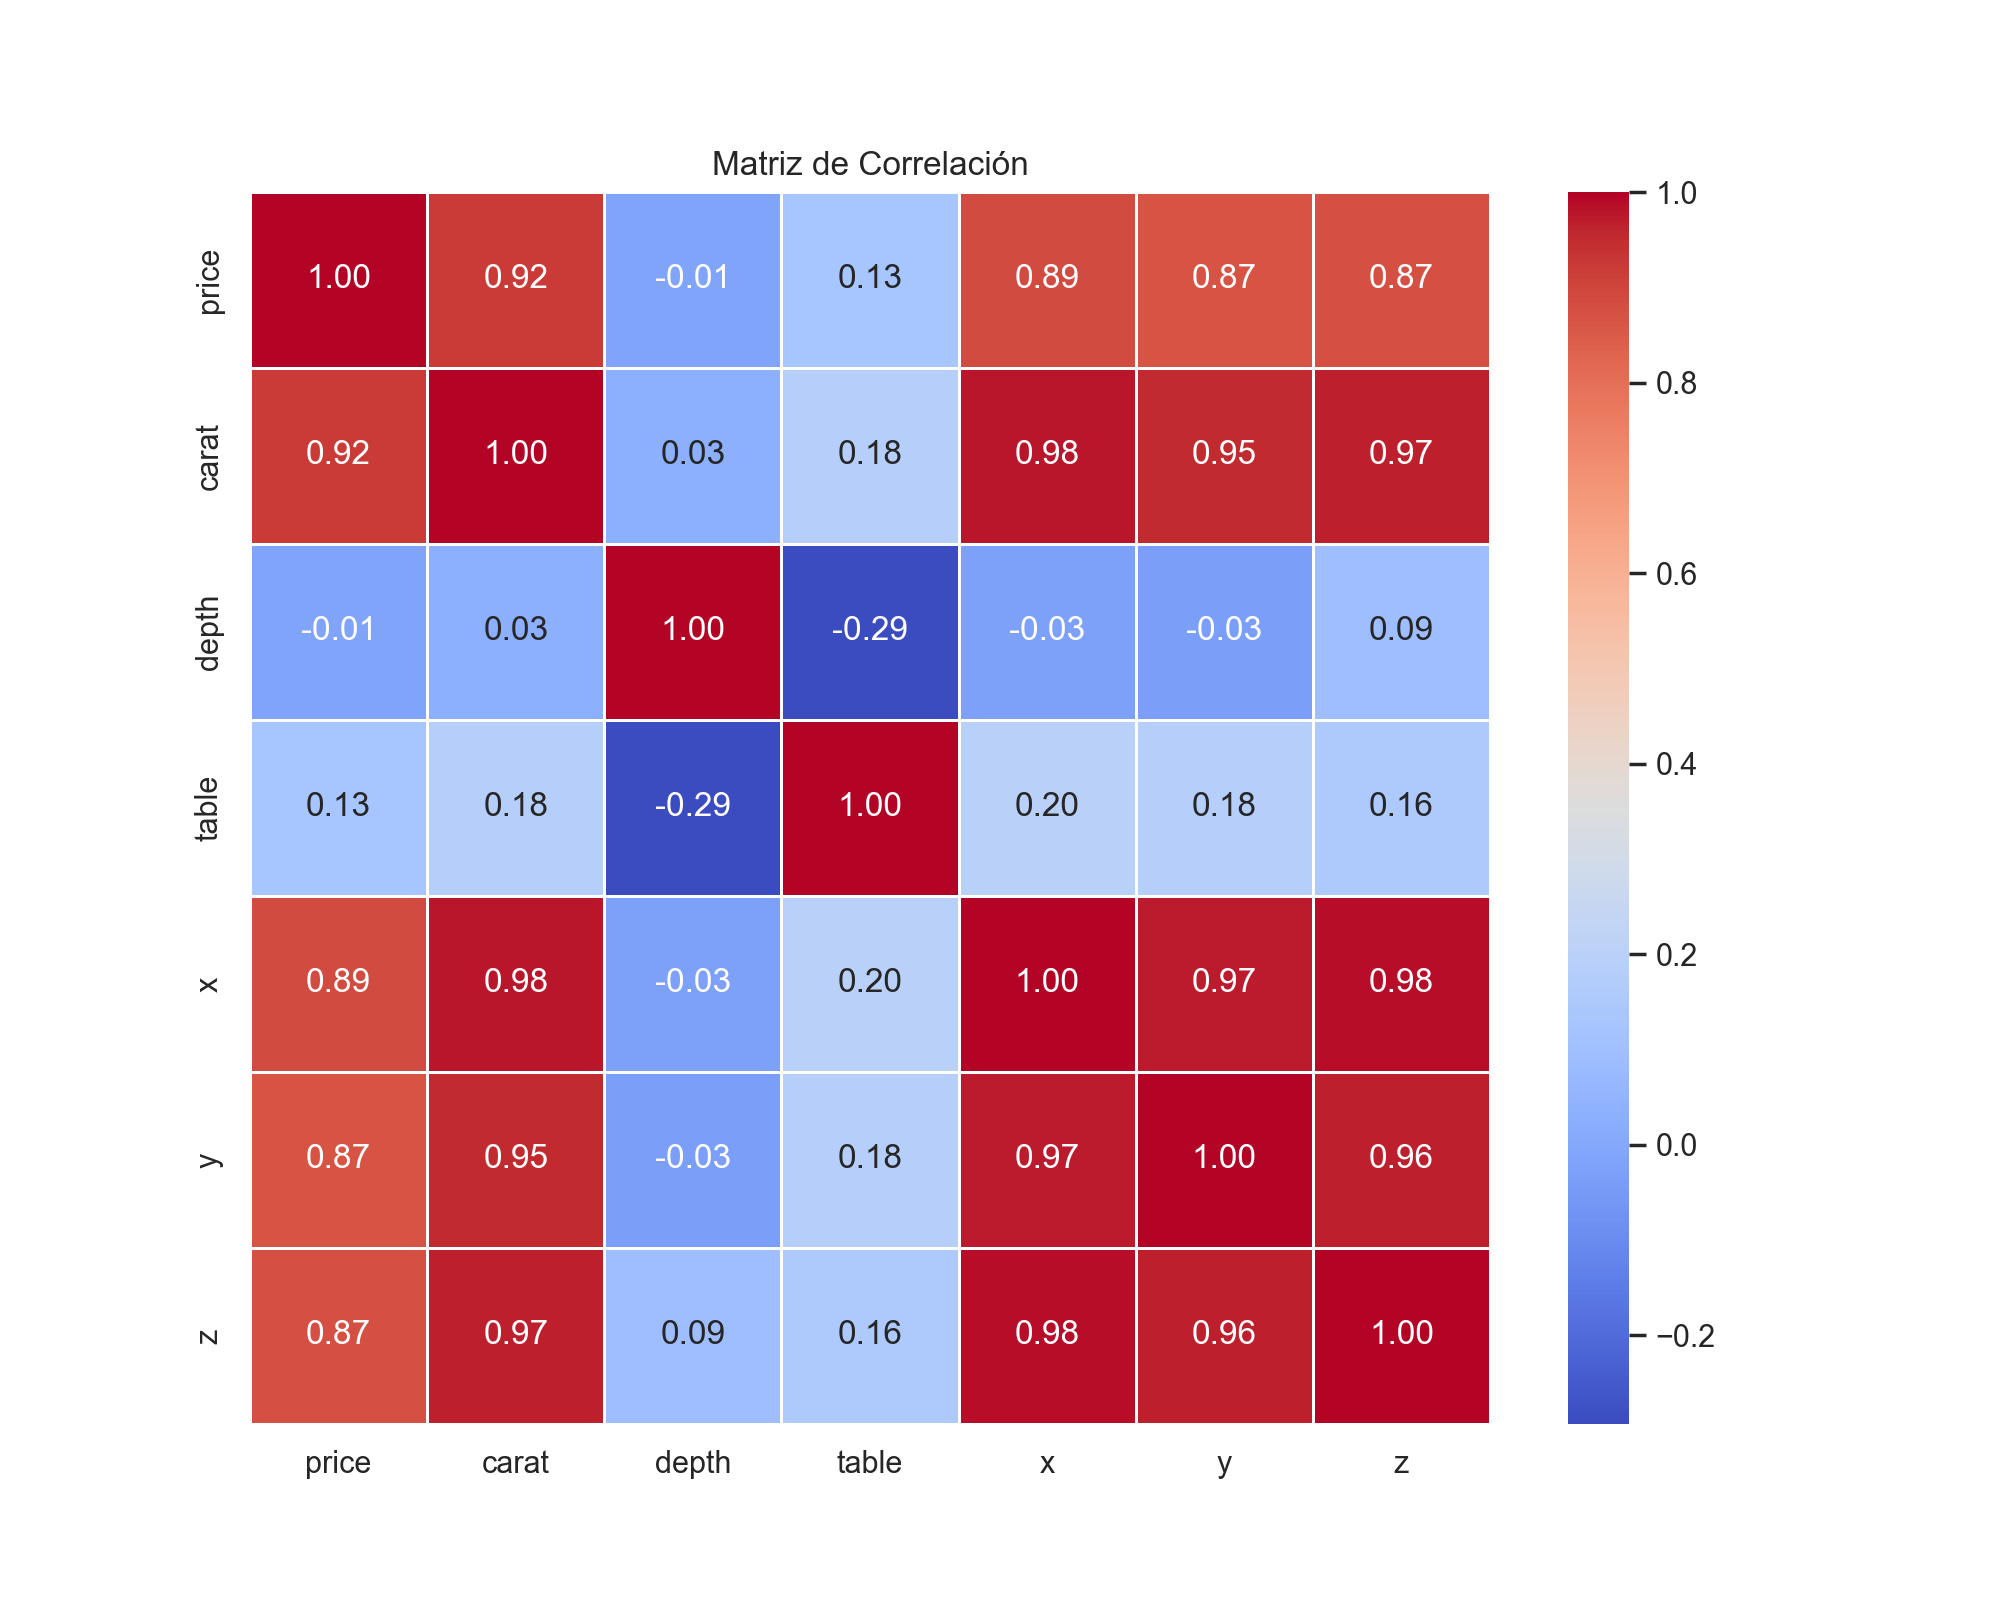

In [82]:
# Matriz de correlación para entender las relaciones entre las variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_new.corr(),annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


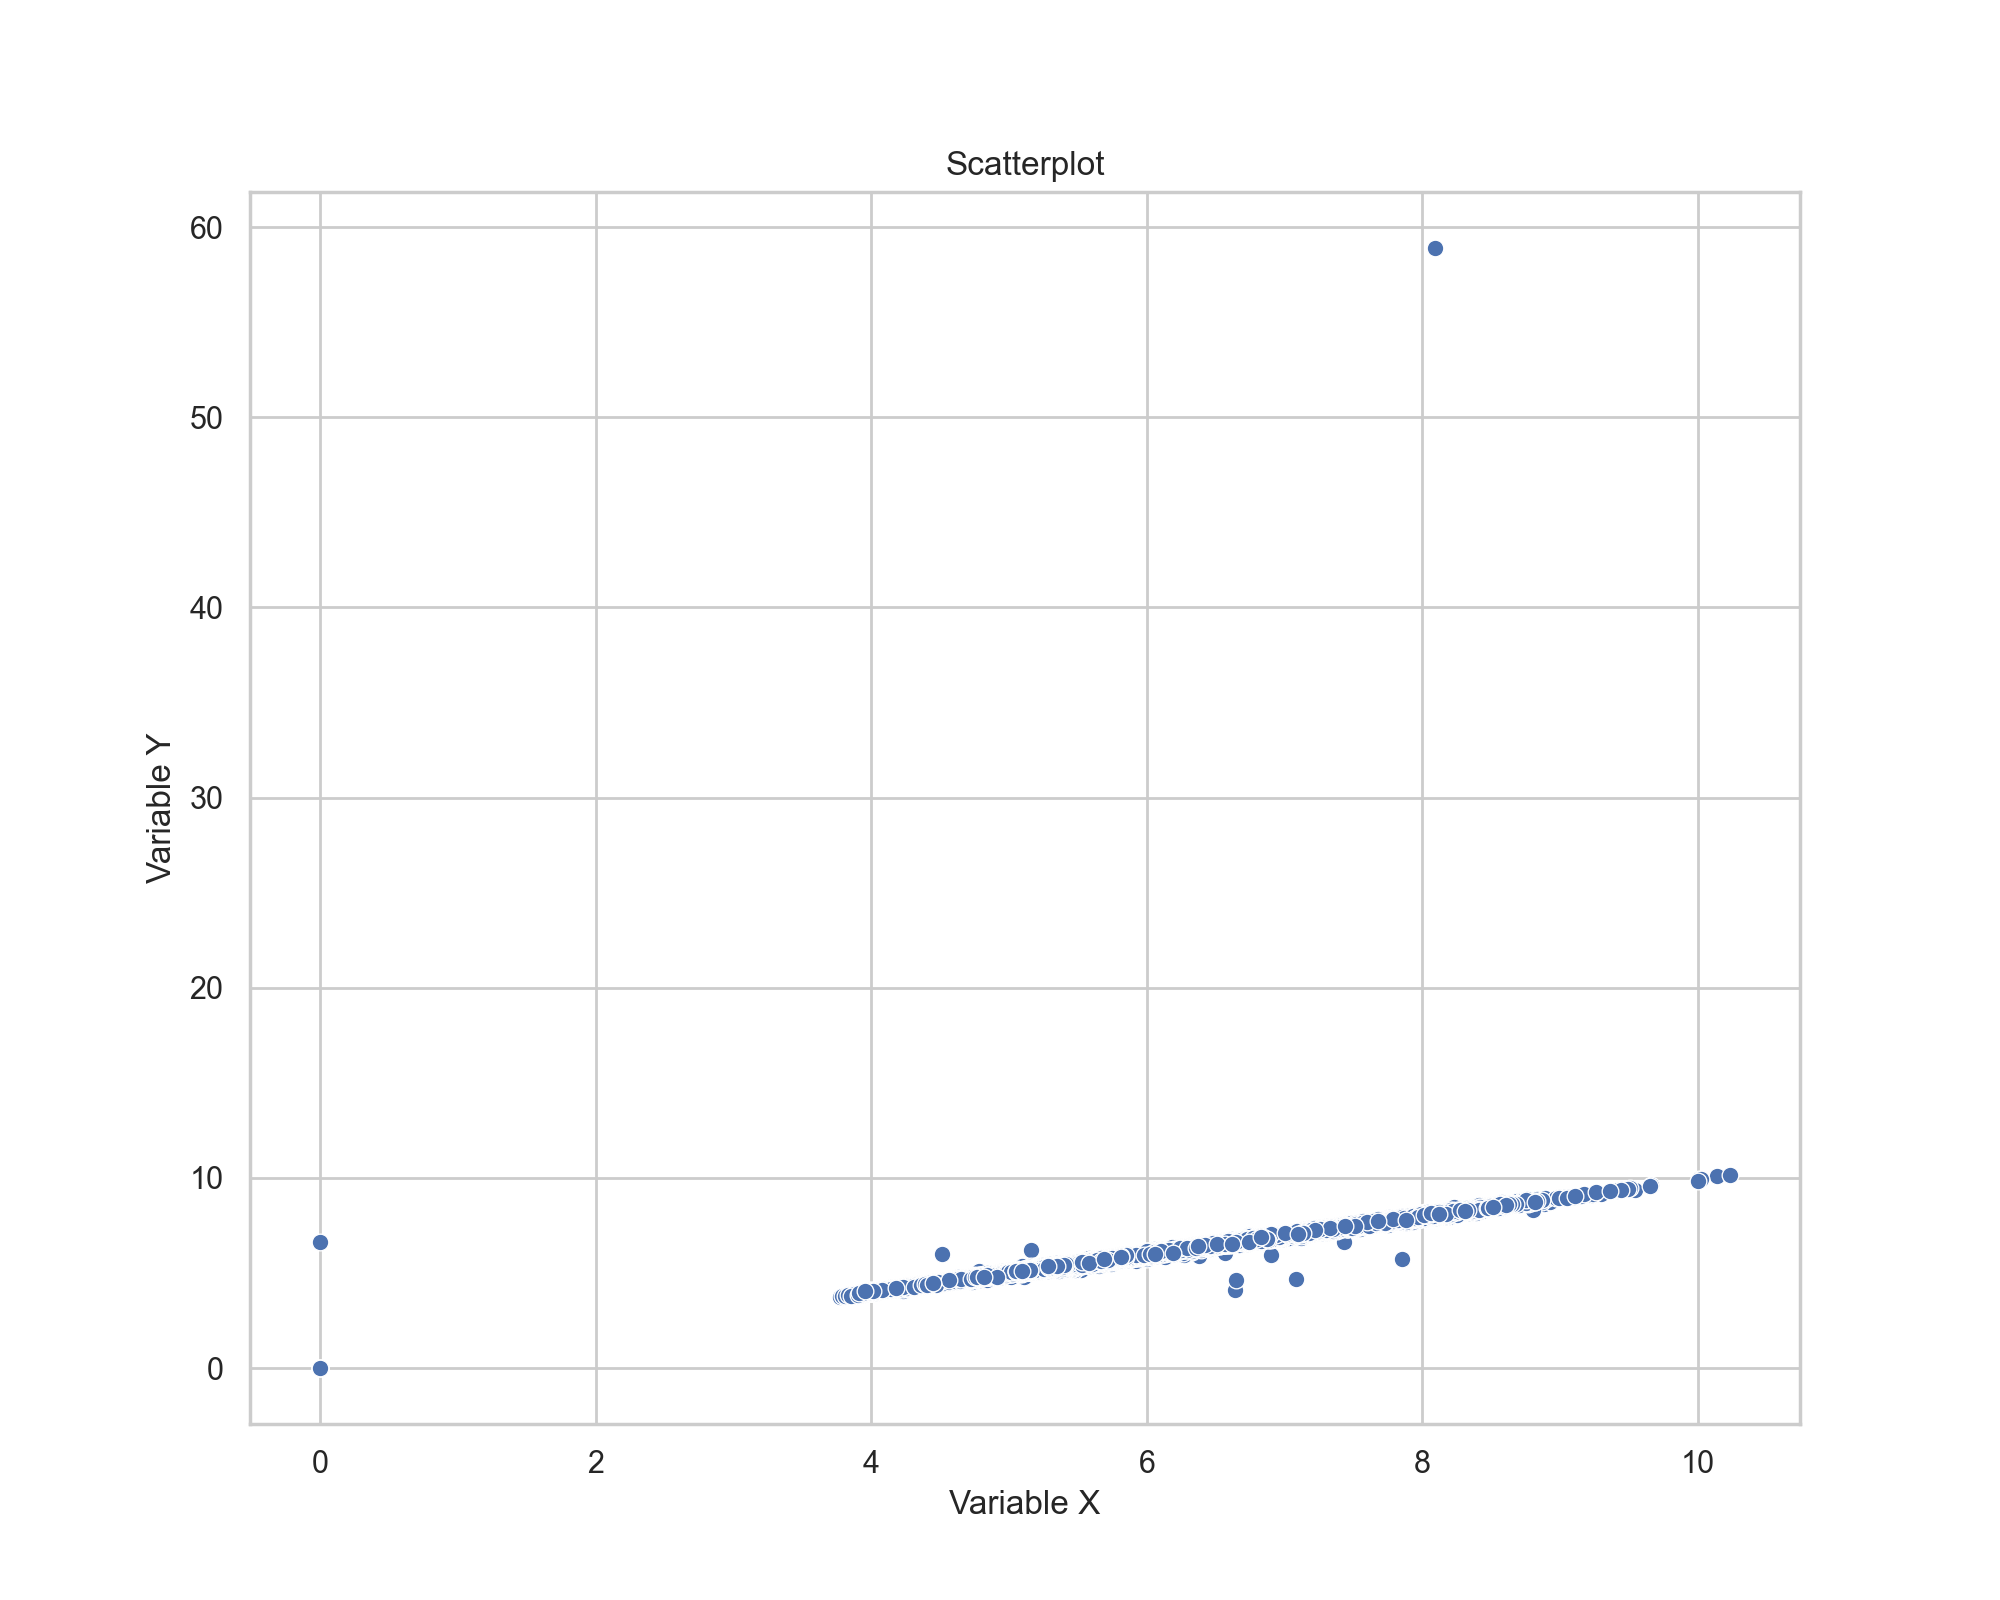

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.scatterplot(x='x', y='y', data=df_diamond_final)

plt.title('Scatterplot')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')

plt.show()


In [84]:
import plotnine

In [85]:
from plotnine import ggplot, aes, geom_bar
ggplot(data = df_diamond_final) 
geom_bar(mapping = aes(x = 'price'))

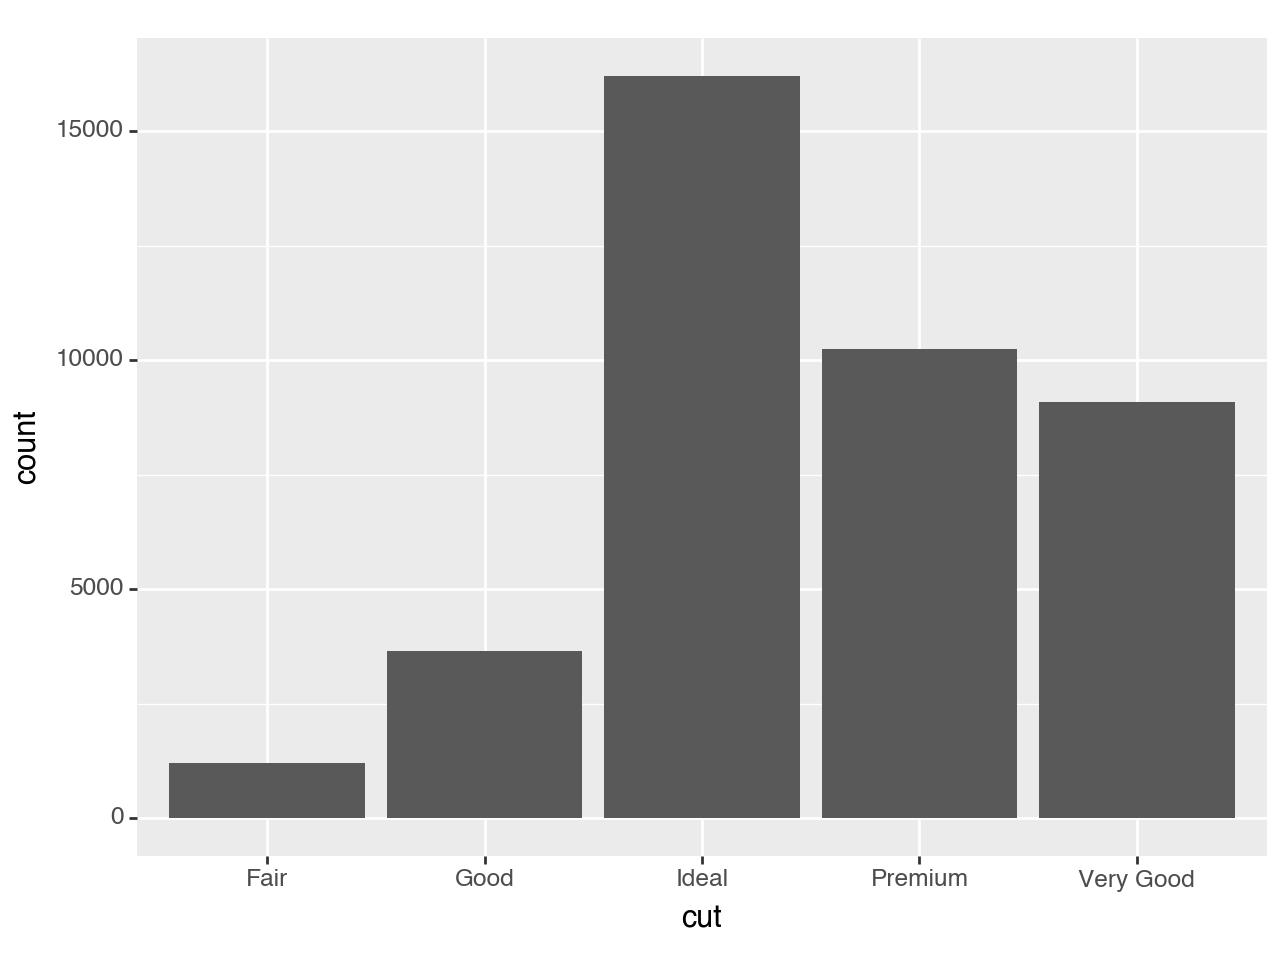

<Figure Size: (640 x 480)>

In [86]:
#Gráfico de cortes vendidos 
ggplot(data = df_diamond_final) + geom_bar(mapping = aes(x = 'cut'))

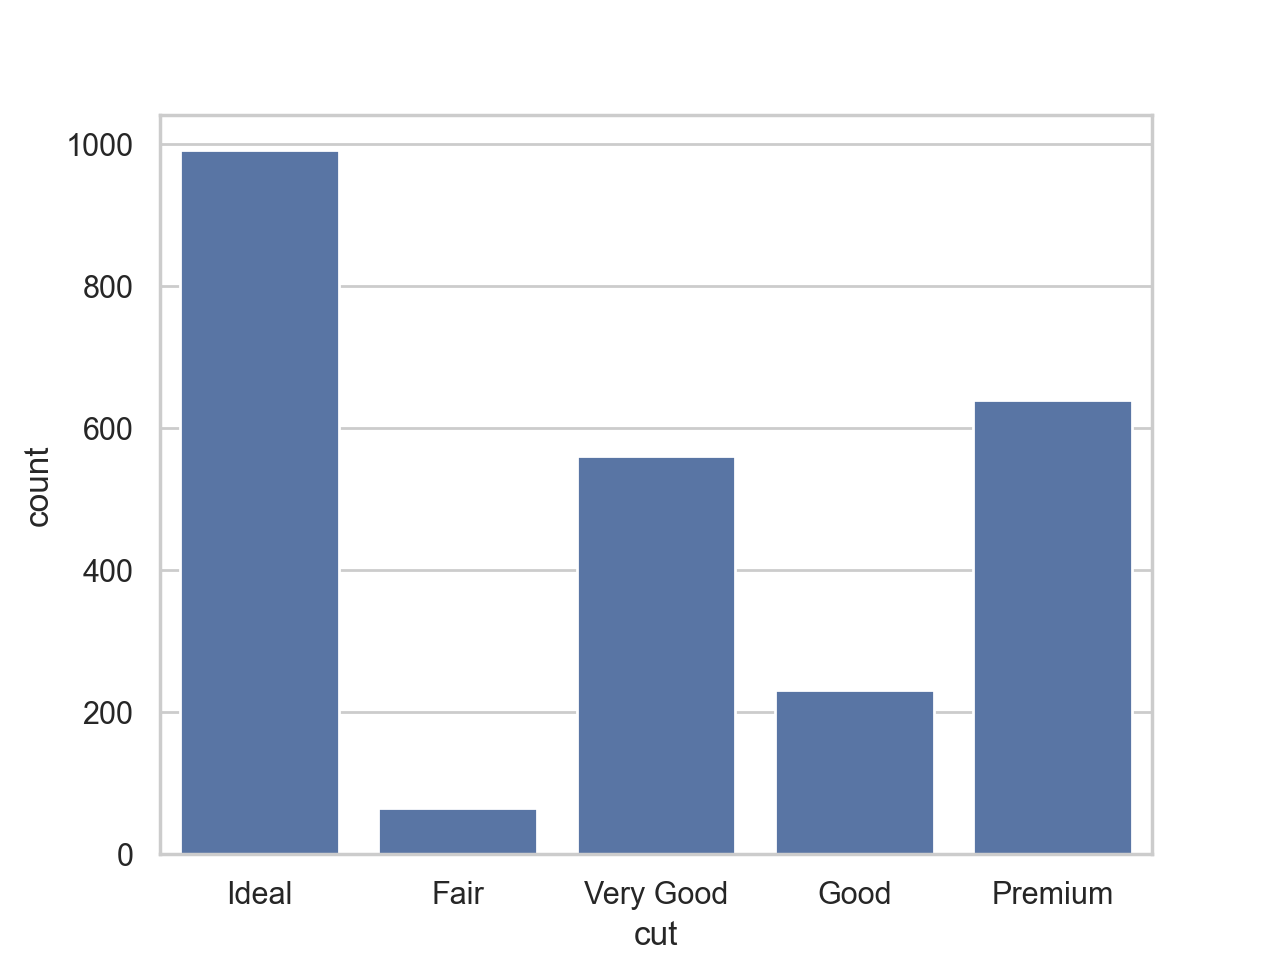

In [87]:
#Grafico de cortes vendidos en Amsterdam
ciudad = 'Dubai'

df_ciudad = df_diamond_final[df_diamond_final['city'] == ciudad]

sns.countplot(data=df_ciudad, x='cut')
plt.show()


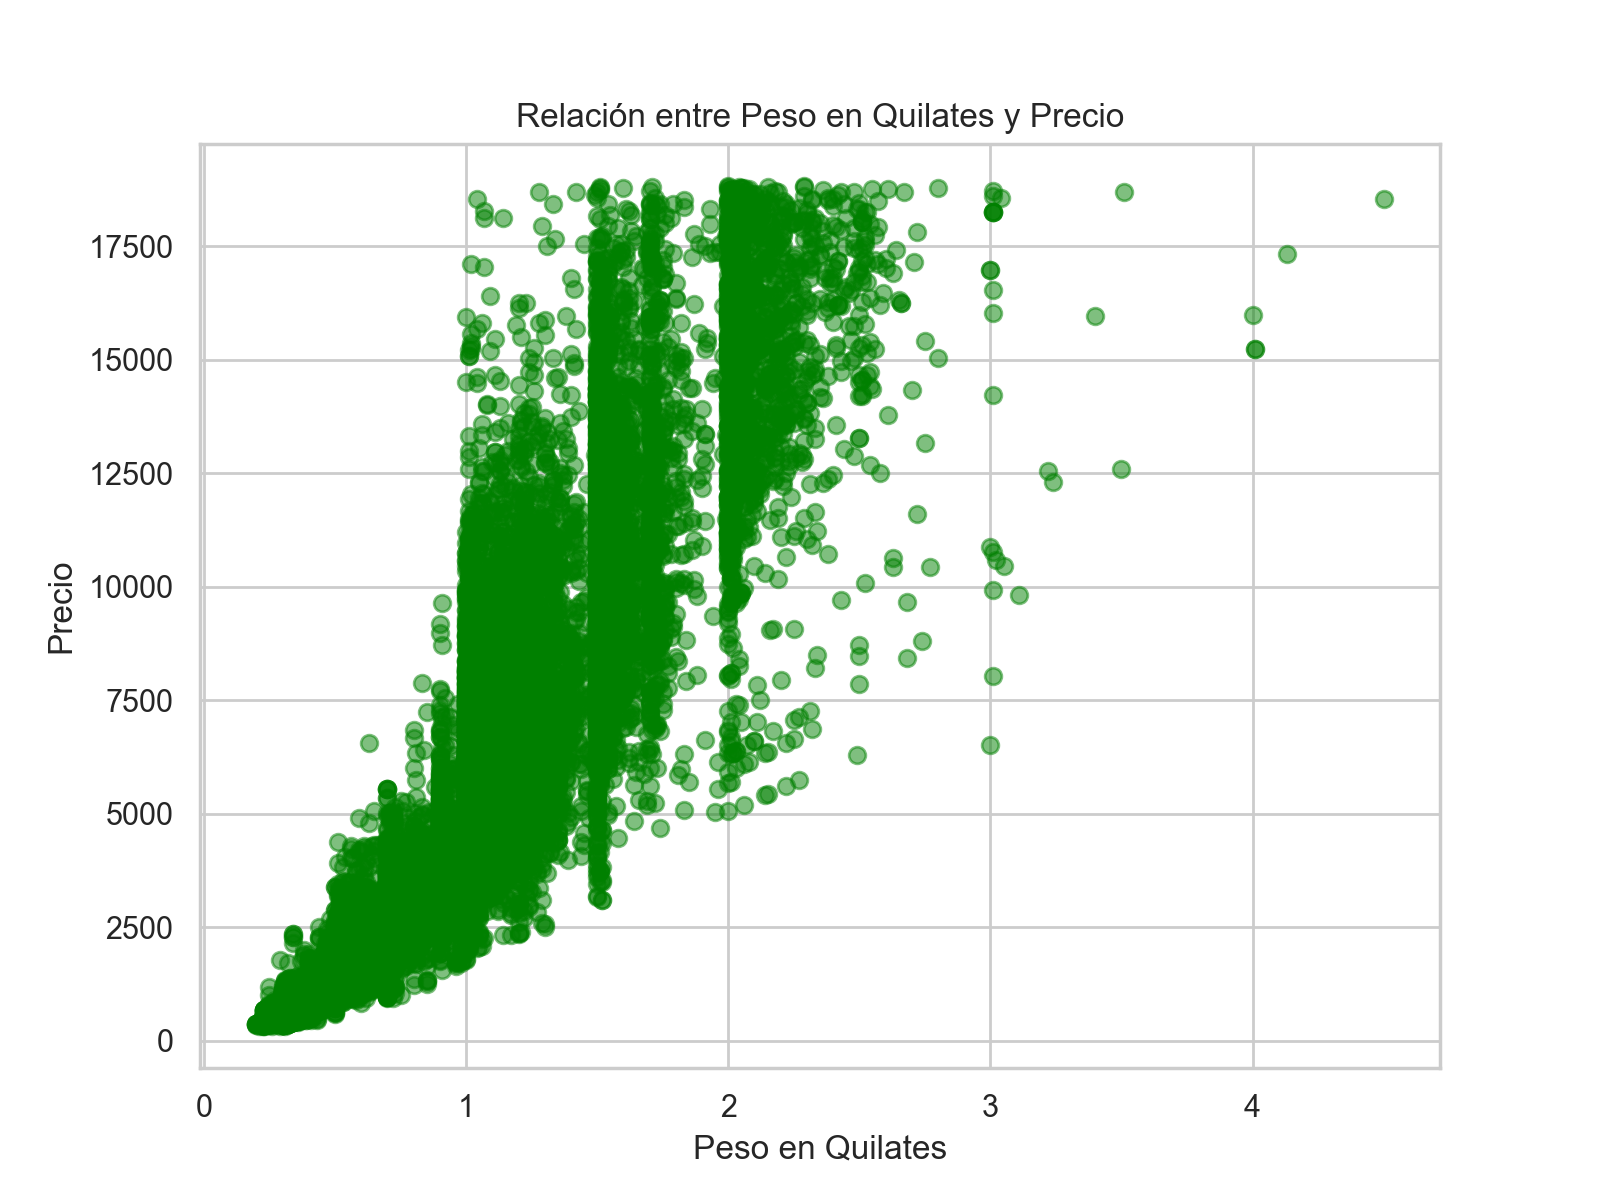

In [88]:
# Suponiendo que tienes un DataFrame con datos de diamantes
# diamond_data = pd.read_csv('datos_diamantes.csv')

plt.figure(figsize=(8, 6))
plt.scatter(df_diamond_final['carat'], df_diamond_final['price'], alpha=0.5, c = 'green')
plt.title('Relación entre Peso en Quilates y Precio')
plt.xlabel('Peso en Quilates')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

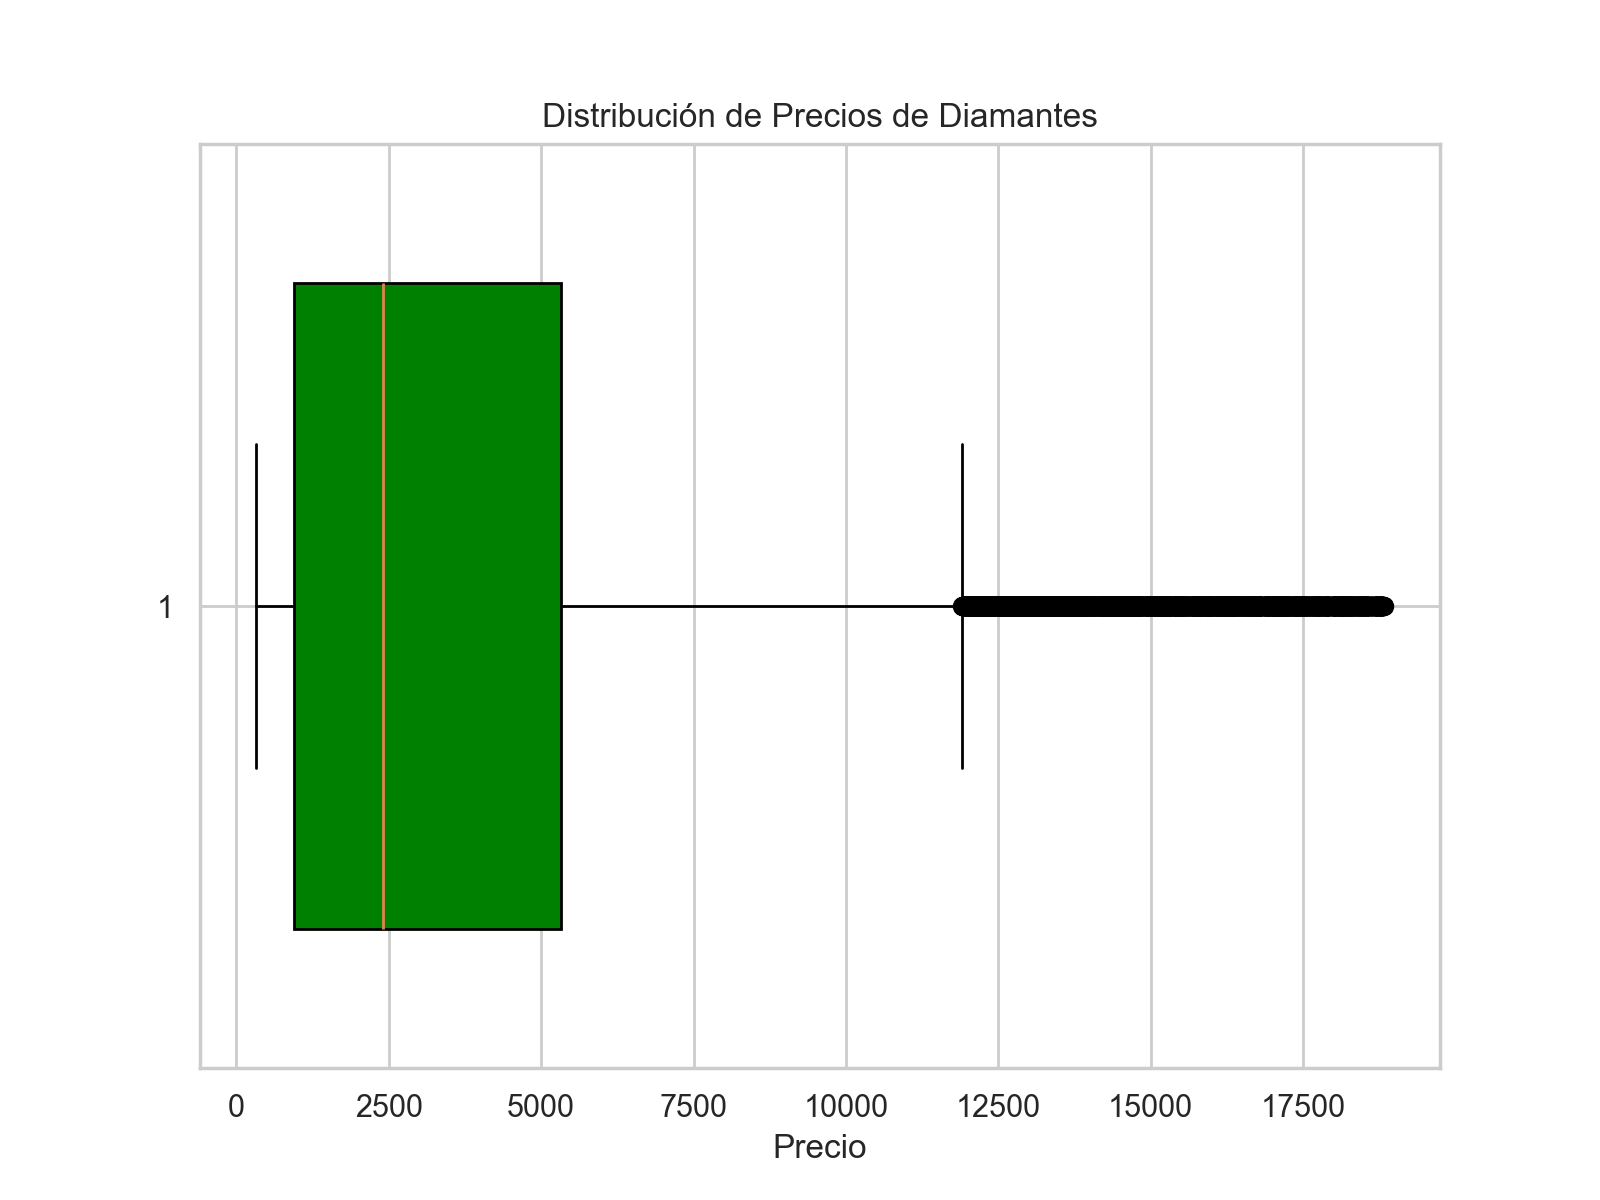

In [89]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_diamond_final['price'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='green', color='black'))
plt.title('Distribución de Precios de Diamantes')
plt.xlabel('Precio')
plt.grid(True)
plt.show()

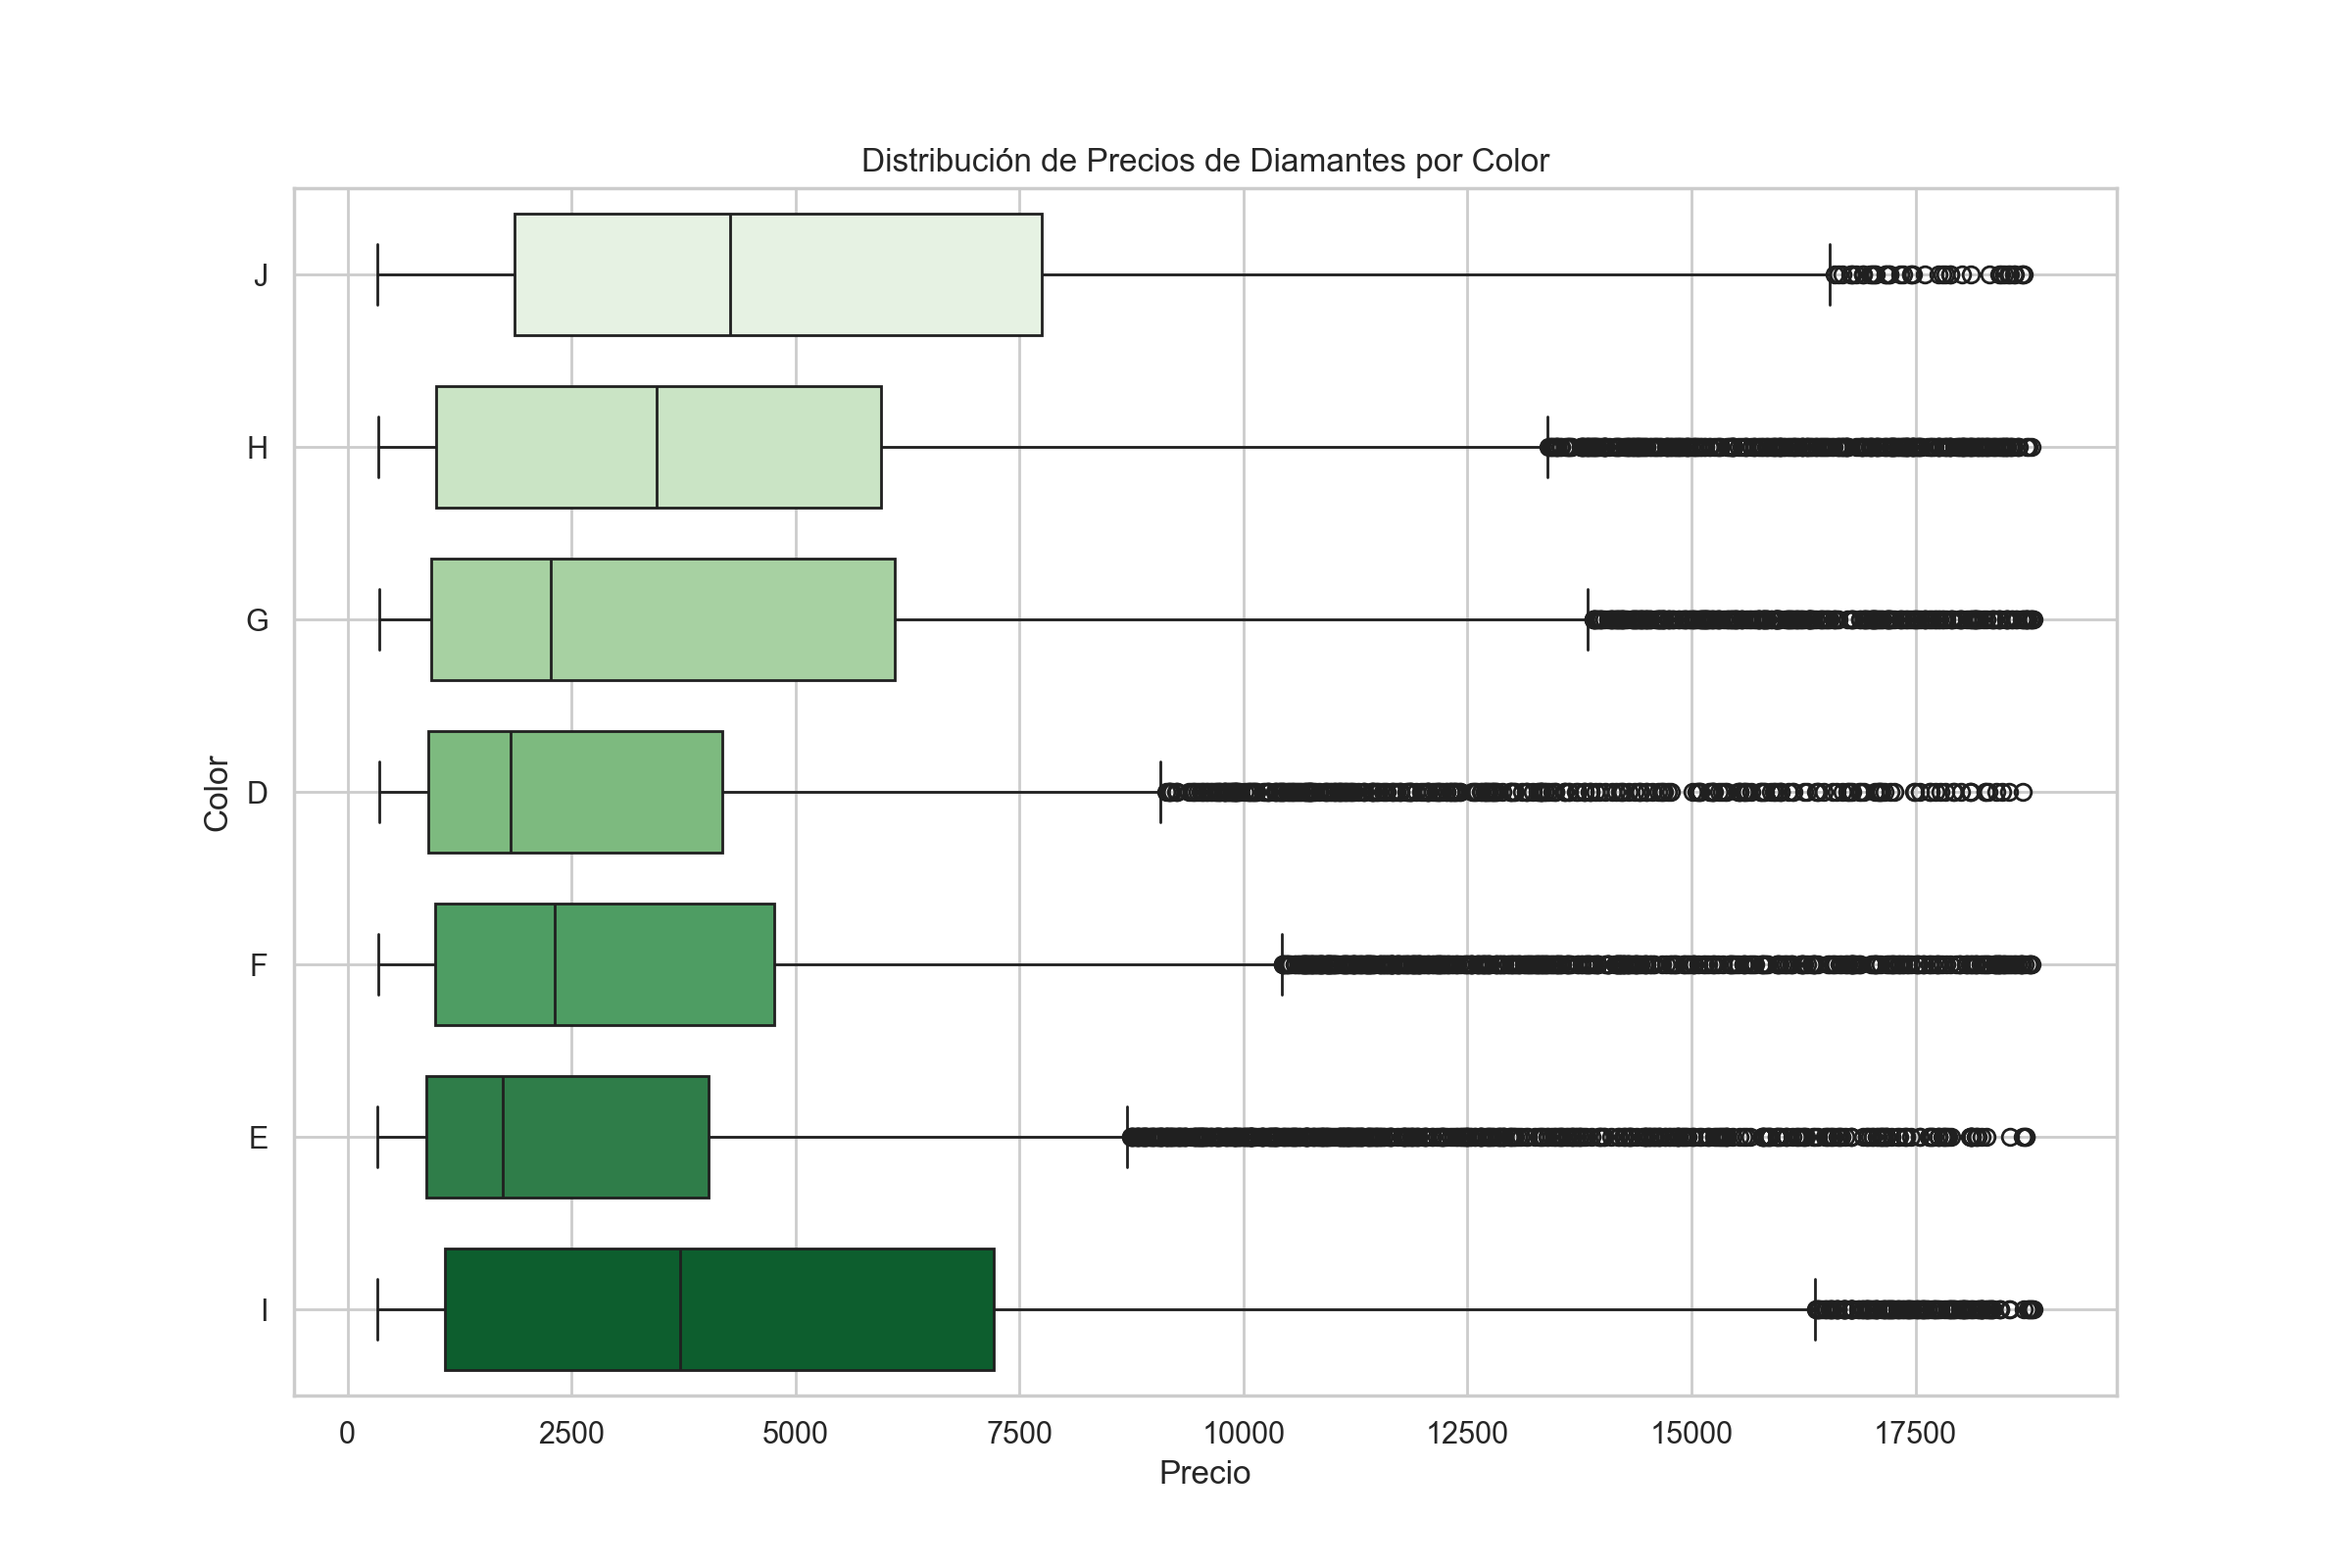

In [90]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_diamond_final, x='price', y='color', width=0.7, palette='Greens')
plt.title('Distribución de Precios de Diamantes por Color')
plt.xlabel('Precio')
plt.ylabel('Color')
plt.grid(True)
plt.show()
